# Analysis
## CSV Dataset
    

In [6]:
# combine_csvs.py

import pandas as pd
import glob
import os

csv_data_2022_path = os.path.join('..', 'csv_data', 'csv_data_2022', '*.csv')
csv_data_2023_path = os.path.join('..', 'csv_data', 'csv_data_2023', '*.csv')

# Get all matching CSV files
csv_2022_files = glob.glob(csv_data_2022_path)
csv_2023_files = glob.glob(csv_data_2023_path)

dfs_2022 = []
for file in csv_2022_files:
    try:
        df = pd.read_csv(file, encoding='utf-8')
    except UnicodeDecodeError:
        # If UTF-8 fails, try cp1252
        df = pd.read_csv(file, encoding='cp1252')
    dfs_2022.append(df)

dfs_2023 = []
for file in csv_2023_files:
    try:
        df = pd.read_csv(file, encoding='utf-8')
    except UnicodeDecodeError:
        df = pd.read_csv(file, encoding='cp1252')
    dfs_2023.append(df)

# Combine all dataframes within each year
combined_2022 = pd.concat(dfs_2022, ignore_index=True)
combined_2023 = pd.concat(dfs_2023, ignore_index=True)

# Combine 2022 and 2023 data into one DataFrame
combined_all = pd.concat([combined_2022, combined_2023], ignore_index=True)

# Another saving options
combined_2022.to_csv('combined_2022.csv', index=False)
combined_2023.to_csv('combined_2023.csv', index=False)
combined_all.to_csv('combined_all.csv', index=False)

print("Data successfully combined!")
print("Number of rows in 2022 dataset:", len(combined_2022))
print("Number of rows in 2023 dataset:", len(combined_2023))
print("Total number of rows in combined dataset:", len(combined_all))

C:\Users\jong0\AppData\Local\Temp\ipykernel_44676\30089482.py:17: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file, encoding='utf-8')


Data successfully combined!
Number of rows in 2022 dataset: 1053022
Number of rows in 2023 dataset: 8575
Total number of rows in combined dataset: 1061597


    Filter most of the duplicate(fundamental columns) and see additional column names provided by different teams.

In [7]:
import os
import csv

# If your Jupyter notebook is in a folder named "Sub 3" and "csv_data" is at the same level,
# the relative paths for csv_data_2022 and csv_data_2023 would be as follows:
csv_dir_2022 = os.path.join('..', 'csv_data', 'csv_data_2022')
csv_dir_2023 = os.path.join('..', 'csv_data', 'csv_data_2023')

def get_column_names(csv_dir):
    """Getting mostly non-duplicate column names from the set of csv files in the directory."""
    column_names = []

    for filename in os.listdir(csv_dir):
        # Construct the full path to the CSV file
        file_path = os.path.join(csv_dir, filename)
        try:
            # Try reading the file with UTF-8 encoding
            with open(file_path, 'r', encoding='utf-8') as file:
                csv_reader = csv.reader(file, delimiter=',')
                for first_row in csv_reader:
                    for column_name in first_row:
                        if column_name.lower().strip() not in column_names:
                            column_names.append(column_name.lower().strip())
                    break
        except:
            # If UTF-8 fails, try cp1252 encoding
            with open(file_path, 'r', encoding='cp1252') as file:
                csv_reader = csv.reader(file, delimiter=',')
                for first_row in csv_reader:
                    for column_name in first_row:
                        if column_name.lower().strip() not in column_names:
                            column_names.append(column_name.lower().strip())
                    break

    return column_names

columns_2022 = get_column_names(csv_dir_2022)
columns_2023 = get_column_names(csv_dir_2023)

print(columns_2022)
print(columns_2023)


['\ufeffdate', 'time', 'category', 'occupancy', 'driver‘s gender', 'direction', 'date', 'type', "driver's gender", 'approach/exit', 'additionaldata2', 'blinkers/handgestures', 'electric or not', 'electric vehicle', 'undergraduate driver', 'age identifier', 'exhaust pipe', 'black smoke', 'turn', '', 'cartype', 'directionofexit', 'passenger type', 'frequency', 'electric / non-electric vehicle', 'gender of the driver', 'electric', 'time ( in am)', 'direction of vehicle', 'type of vehicle', 'colour of vehicle', 'engine type', 'vehicle age', 'gender', 'wait time', 'no of pedestrian', 'transportation type', 'weather', 'eco-friendly', 'bus driver gender', 'busno', 'driver gender', 'bus type', 'vehicle brand', 'temperature (c)', 'vehicle type', 'transport type (public/private)', 'colour', 'cumulative frequency', 'brand', 'driver_age', 'electric_vehicle', 'car size', 'electric or hybrid?', 'female occupancy', 'gender of driver', 'sound_level', 'owner', 'data', 'speed(km/h)', 'capacity', 'not_pe

## Relative column selection
    By looking through column names, I could see adequate records collected that indicates electric or eco-friendly vehicles.
    This led me thinking of utilise these records to create an analysis.
    But before we concatenate the rows, I have to choose CSVs that have relevant columns.
    
## Hypothesis
    There is an increase in number of electric cars driven by any commuter to University of Bath.
    
    Since there has been a change in vehicle market showing quite an investment in electric vehicle and the facility or support  for electric vehicle is growing, I thought there would be a general increase in counts.
    Many global organizations have also announced that we must change our vehicles to the ones that use recyclable energy, electricity due to the rapid climate change and acceleration of pollution.
    I will try to compare the number of electric cars (also hybrid) and non-electric cars to see whether there is a public movement.
    

In [172]:
#Looking for relevant column names by 
def relative_keywords(columns, keywords):
    """Returns column names that hold keywords in them"""
    
    relative_columns = []
    
    for column_name in columns:
        for keyword in keywords:
            if keyword in column_name.lower().strip() and column_name not in relative_columns:
                relative_columns.append(column_name)
    
    return relative_columns

keywords = ['electric', 'exhaust', 'cartype', 'engine', 'petrol', 'fuel', 'friend', 'green', 'eco']

relative_columns_2022 = relative_keywords(columns_2022, keywords)
relative_columns_2023 = relative_keywords(columns_2023, keywords)

print(relative_columns_2022)
print(relative_columns_2023)

['electric or not', 'electric vehicle', 'exhaust pipe', 'cartype', 'electric / non-electric vehicle', 'electric', 'engine type', 'eco-friendly', 'electric_vehicle', 'electric or hybrid?', 'not_petrol', 'engine', 'fuel']
['is electric', 'fuel type', 'electric', 'is_env_friendly', 'eco-friendly', 'green badge', 'green vehicle', 'hasgreennumberplate', 'ecofriendly']


In [173]:
#Modify it to get the original series of column names from CSVs
def get_ori_column_names(csv_dir):
    """Retrieving the original column names that are not duplicate"""
    
    column_names = []
    ori_column_names = []
    
    for filename in os.listdir(csv_dir):
        try:
            with open(csv_dir+"/"+filename, 'r', encoding ='utf-8') as file:
                csv_reader = csv.reader(file, delimiter = ',')
                for first_row in csv_reader:
                    for column_name in first_row:
                        if column_name.lower().strip() not in column_names:
                            column_names.append(column_name.lower().strip())
                            ori_column_names.append(column_name)
                    break
        except:
            with open(csv_dir+"/"+filename, 'r', encoding ='cp1252') as file:
                csv_reader = csv.reader(file, delimiter = ',')
                for first_row in csv_reader:
                    for column_name in first_row:
                        if column_name.lower().strip() not in column_names:
                            column_names.append(column_name.lower().strip())
                            ori_column_names.append(column_name)
                    break
        
    
    return ori_column_names
original_col_2022 = relative_keywords(get_ori_column_names(csv_dir_2022), keywords)
original_col_2023 = relative_keywords(get_ori_column_names(csv_dir_2023), keywords)
print(original_col_2022)
print(original_col_2023)

['Electric or not', 'Electric Vehicle', 'Exhaust Pipe', 'CarType', 'Electric / Non-Electric Vehicle', 'Electric', 'Engine Type', 'eco-friendly', ' Electric_Vehicle', 'Electric or Hybrid?', 'not_petrol', 'Engine', 'FUEL']
['Is Electric', 'Fuel Type', 'Electric', 'Is_env_friendly', 'Eco-Friendly', 'Green Badge', 'Green Vehicle', ' HasGreenNumberPlate', 'EcoFriendly']


## concatenation

In [174]:
import pandas as pd

def read_df_rel(csv_dir, original_columns):
    """Merge all CSVs that hold relevant columns"""
    df_merged = pd.DataFrame()
    
    for csv in os.listdir(csv_dir):
        df_col_list = pd.read_csv(csv_dir+"/"+csv, nrows=0).columns.tolist()
        df_temp_list = [x for x in df_col_list if x in original_columns]
        if len(df_temp_list) != 0:
            df_temp = pd.read_csv(csv_dir+"/"+csv)
#             df_merged = pd.concat([df_merged, df_temp], ignore_index=True)
            df_merged = df_merged.append(df_temp, ignore_index = True)
            
    return df_merged

df_2022 = read_df_rel(csv_dir_2022, original_col_2022)
df_2023 = read_df_rel(csv_dir_2023, original_col_2023)
print("2022 CSV rows: \n:", df_2022)
print("2023 CSV rows: \n:", df_2023)

2022 CSV rows: 
:             Date      Time Direction     Type Occupancy Blinkers/Handgestures  \
0     26/10/2022   10:20am       out      bus       10%                   yes   
1     26/10/2022   10:20am       out  bicycle         1                    no   
2     26/10/2022   10:20am       out      car         1                   yes   
3     26/10/2022   10:20am       out      car         2                   yes   
4     26/10/2022   10:20am       out      car         1                   yes   
...          ...       ...       ...      ...       ...                   ...   
1895  26-10-2022  10:25:00       Out      Van         1                   NaN   
1896  26-10-2022  10:25:00       Out      Car         1                   NaN   
1897  26-10-2022  10:25:00       Out      Car         1                   NaN   
1898  26-10-2022  10:25:00       Out      Car         1                   NaN   
1899  26-10-2022  10:25:00       Out      Car         1                   NaN   

     Elec

# Data cleaning
    Even after selecting columns based on keywords, a few of those can repetitive and irrelevant.
    It is time to merge them properly.
    
    All the data cleaning functions will be called in the last data_cleaning(csv, keywords) function.

In [175]:
result_column_list_2022 = df_2022.columns.values.tolist()
result_column_list_2023 = df_2023.columns.values.tolist()

print(result_column_list_2022, "\n", result_column_list_2023)

['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Blinkers/Handgestures', 'Electric or not', 'Electric Vehicle', 'AdditionalData2', 'Exhaust Pipe', 'Black smoke', 'Unnamed: 0', 'CarType', 'DirectionofExit', 'Electric / Non-Electric Vehicle', 'Gender of the driver', 'Electric', ' Time', ' Direction', ' Type', ' Occupancy', 'Engine Type', ' Vehicle Age', 'Time ', 'Unnamed: 6', 'eco-friendly', ' Driver_Age', ' Electric_Vehicle', 'Car Size', 'Electric or Hybrid?', 'Owner', 'date', 'direction', 'occupancy', 'capacity', 'not_petrol', 'type', 'time', 'Engine', 'Personal', 'Direction of travel', 'Category of vehicle', 'Occupancy of the Vehicle', 'Vehicle Colour', 'FUEL'] 
 ['Date', 'Time', 'Direction', 'Type', 'Occupancy', 'Is Electric', 'Date ', 'Driver Gender', 'Fuel Type', 'Electric', 'Part of Mobility Service', 'Age_Id', 'Is_env_friendly', 'Eco-Friendly', 'Date of Car', 'Unnamed: 7', 'AdditionalData2', 'Vehicle Type', 'Make', 'Green Badge', 'Family Car', 'MobilityService', 'Green Vehicle

    To start with, the base columns can be arranged into the same columns.
    Also I should drop any irrelevant column came with the csv that held relevant columns

In [176]:
#try make same column names for all csv
#return err if columns are wrong in the csv
def base_columns(csv, unclean_df):
    """Make all the differenly named main columns such as Date, Time, Direction, Type and Occupancy into same one"""
    column_list = unclean_df.columns.tolist()

    if len(column_list) == 0:
        print('[', csv, ']\'s columns names are empty')
        return False, unclean_df
    
    #There missing columns or too many columns in  22351444.csv
    #Had an empty column name at the front
    #drop the column #len(column_list) == 8 and column_list[0] == ''
    #if the column list has 'Unnamed : (integer)'
    elif all([x for x in column_list if 'Unnamed' in x]):
        unclean_df = unclean_df.drop([x for x in column_list if 'Unnamed' in x], axis=1)
        column_list = unclean_df.columns.tolist()
        
#     if csv == '22351453.csv':
#         print([column.lower().strip().capitalize() for column in column_list])
        

    if 5 <= len(column_list) <= 7: 
#         try:

        #It will hold any other column name
        extra_list = []
        required_col_list = ['Date', 'Time', 'Direction', 'Type', 'Occupancy']

        for column in unclean_df.columns.tolist():
            
            clean_col_name = column.lower().strip().capitalize()

            if clean_col_name == 'Date':
                unclean_df = unclean_df.rename(columns={column : 'Date'})
#                 print(csv, ' Date form: ', unclean_df['Date'][0])
            elif clean_col_name == 'Time':
                unclean_df = unclean_df.rename(columns={column : 'Time'})
            elif clean_col_name == 'Direction' or clean_col_name == 'Direction of travel':
                unclean_df = unclean_df.rename(columns={column : 'Direction'})
            elif clean_col_name == 'Type' or clean_col_name == 'Vehicle type' or clean_col_name == 'Category of vehicle':
                unclean_df = unclean_df.rename(columns={column : 'Type'})
            elif clean_col_name == 'Occupancy' or clean_col_name == 'Occupancy of the vehicle':
                unclean_df = unclean_df.rename(columns={column : 'Occupancy'})
            else:
                extra_list.append(column)
                
        #If the unclean_df which is currenlty opened csv 
        required = set(required_col_list).issubset(unclean_df.columns.tolist())

        if len(extra_list) <= 2 and required:
            re_order = required_col_list + extra_list
            unclean_df = unclean_df[re_order]
            return True, unclean_df

        else:
            print('There is something wrong for base column names in: ', csv)
            print('Columns: ', unclean_df.columns.tolist(), ', extra_list: ', extra_list, str(required))
            return False, unclean_df
        
#         except Exception as err:
#             print('Error during cleaning columns of ', csv, ' : ', err)

#             return False
                    
    else:
        print('There missing columns or too many columns in:',csv)
        return False, unclean_df

## Confusing column names analysis

AdditionalData2: 22351436.csv (null), 22351449.csv (empty), 22792742.csv (null), 22792788.csv (null)
    
22351444.csv (DirectionofExit: Where the vehicle turns to at the entrance)

22351491.csv (capacity: How many ppl can fit in the vehicle)

22792744.csv (Make: Car brand)

22792726.csv (Date of Car: The year the car model was released (?))
    
22351492.csv (Personal: boolean, whether the vehicle is owned by the driver or not)

22792720.csv (Part of Mobility Service: couldn't figure out)

In [177]:
def column_dropping(unclean_df):
    '''Drop any columns not needed for analysis'''
    
    drop_want_col_2022 = ['Blinkers/Handgestures','AdditionalData2', 'DirectionofExit', 'Gender of the driver', ' Vehicle Age',  ' Driver_Age', 'Car Size', 'Owner', 'Personal', 'Vehicle Colour', 'Black smoke']
    drop_want_col_2023 = ['Driver Gender', 'Part of Mobility Service', 'Age_Id', 'Date of Car', 'Make', 'Family Car', 'MobilityService', 'Date Code', 'Date of vehicle', ' AdditionalData2']
    
    for column in unclean_df.columns.tolist():
        
        if column in drop_want_col_2022 or column in drop_want_col_2023:
            unclean_df = unclean_df.drop(column, axis=1)
        
    return unclean_df

## Matching column names
    Now we have to match the form of rows of all CSVs added,
    Date
    - 2022: 26/10/2022, 25-10-2022, 25/10/22, 2022-10-25
    - 2023: 24-10-2023, Tuesday, 24 October 2023, 27/10/2023, 24-10-23
    Time:
    - 2022: 10:20am, 9.20am, 10:00 AM, 09:30, 10.40AM, 09:55:00
    - 2023: 10:15:00 AM
    Direction:
    - inward: 'in', ' in', 'IN'
    - outward: 'out', 'Out'

In [178]:
import re
import math

def date_modifier(date):
    '''Modifying function for 'Date' Column to use inside DataFrame.apply() function'''
    if date == 'Tuesday, 24 October 2023':
        return '2023-10-24'
    
    
    dt_pattern_d_m_y = r'(?P<day>\d{2})(/|-)(?P<month>\d{2})(/|-)(?P<year>(\d{4}|\d{2}))'
    dt_pattern_y_m_d = r'(?P<year>\d{4})(/|-)(?P<month>\d{2})(/|-)(?P<day>\d{2})'
    
    date_match_1 = re.search(dt_pattern_d_m_y, date)
    date_match_2 = re.search(dt_pattern_y_m_d, date)
    

    if date_match_1:
        date_dict = date_match_1.groupdict()

        day = date_dict['day']
        month = date_dict['month']
        year = date_dict['year']

        if len(year) == 2:
            year = '20' + year
        
        result = year+'-'+month+'-'+day
        
        return result
    
    elif date_match_2:
        date_dict = date_match_2.groupdict()

        day = date_dict['day']
        month = date_dict['month']
        year = date_dict['year']
        
        result = year+'-'+month+'-'+day
        
        return result
    
    return date

def time_modifier(time):
    '''Modifying function for 'Time' Column to use inside DataFrame.apply() function'''
    
    
    time_pattern= r'(?P<hour>(\d{2}|\d{1}))(:|.)(?P<min>\d{2})'
#     time_pattern_2 = r'(?P<hour>\d{2})(:|.)(?P<min>\d{2}):(?P<second>\d{2})'

    time_match = re.search(time_pattern, time)
    
    if time_match:
        time_dict = time_match.groupdict()
        
        hour = time_dict['hour']
        minute = time_dict['min']
        
        if int(hour) < 5:
            hour = int(hour) + 12
            hour = str(hour)
            
        minute = math.floor(int(minute) / 5) * 5
            
        
        result = hour + ':' + str(minute) + ':00' 
        
        
        return result
        
def ev_modifier(answer):
    '''Modifying function for 'Electric' Column to use inside DataFrame.apply() function'''
    
    yes_ev = ['yes', ' yes', 'absent', 'electric', 'Yes', 'Electrics', 'Hybrid', 'Electric', ' True',True, 1, 'no engine', 'ELECTRIC', 'ZEV', 'Yes', 'Clean Technology', 'Y', 'hybrid']
    no_ev = ['no', ' no', 'present', 'conventional', 'non-electric', 'No', 'Gasoline',' False', 'Combustible', False, 'fuel', 0, 'combustion', 'GAS', 'ICE', 'NaN', 'Conventional', 'N', 'None', 'No Engine', 'no engine', None, ""]
    
    if answer in yes_ev or answer == True:
        return True
    elif answer in no_ev or answer == False:
        return False
    
def direction_modifier(direction):
    '''Modifying function for 'Direction' Column to use inside DataFrame.apply() function'''
    
    
    inward = ['in', ' in', 'IN']
    outward = ['out', 'Out']
    
    if direction in inward:
        direction = 'in'
        return direction
    elif direction in outward:
        direction = 'out'
        return direction
    
    return direction
        
def column_matching(csv, unclean_df):
    '''Finally using all the modifying functions, match all the records inside the dataframe \n
       date_modifier, time_modifier, ev_modifier, direction_modifier'''
    
    unclean_df['Date'] = unclean_df['Date'].apply(date_modifier)
    
    unclean_df['Time'] = unclean_df['Time'].apply(time_modifier)
    
    if csv == '22351455.csv':
        previous = '10:30:00'
        row_index = 0
        for row in unclean_df['Time']:
            if row == None:
                unclean_df.at[row_index, 'Time'] = previous
            else:
                previous = row
                
            row_index += 1
    
    unclean_df['DateTime'] = pd.to_datetime(unclean_df['Date'] + ' ' + unclean_df['Time'])
    unclean_df = unclean_df.drop(['Date', 'Time'], axis=1)
    unclean_df = unclean_df[['DateTime'] + [col for col in unclean_df.columns if col != 'DateTime']]
    
    if csv == '22351491.csv':
        unclean_df['Occupancy'] = unclean_df['Occupancy'] * unclean_df['capacity']
        unclean_df = unclean_df.drop('capacity', axis=1)
        
    #Merge all the electric vehicle columns
    #uncomment to see how the records are for the electric vehicles
#     print(csv, ':   ', unclean_df.iloc[:5, -1])

    #ev indicating column names
    ev_columns = ['Electric or not', 'Electric Vehicle', 'Exhaust Pipe', 'CarType', 'Electric / Non-Electric Vehicle', 'Electric', 'Engine Type', 'eco-friendly', ' Electric_Vehicle', 'Electric or Hybrid?', 'not_petrol', 'Engine', 'FUEL', 'Is Electric', 'Fuel Type', 'Electric', 'Is_env_friendly', 'Eco-Friendly', 'Green Badge', 'Green Vehicle', ' HasGreenNumberPlate', 'EcoFriendly']
    
#     if csv == '22351455.csv':
#         print('22351455.csv: \n', unclean_df)
#     elif csv == '22351478.csv':
#         print('22351478.csv: \n', unclean_df)
#     elif csv == '22792726.csv':
#         print('22792726.csv: \n', unclean_df)
        
    if unclean_df.columns.tolist()[-1] in ev_columns:
        
#         print(type(unclean_df[unclean_df.columns.tolist()[-1]][0]), ", value: ", unclean_df[unclean_df.columns.tolist()[-1]][0])
#         print(unclean_df.columns.tolist()[-1])

        unclean_df = unclean_df.rename(columns={unclean_df.columns.tolist()[-1] : 'Electric'})
        unclean_df['Electric'].fillna('no', inplace=True)
        unclean_df['Electric'] = unclean_df['Electric'].apply(ev_modifier)
        
#         print(csv, ': ', unclean_df['Electric'][:3])

#         any_nan_row = unclean_df[unclean_df.isna().any(axis=1)]
#         print(csv, ': ', any_nan_row)

    else:
        print(csv, ': Not converting the electric vehicle column right')
        
    unclean_df['Direction'] = unclean_df['Direction'].apply(direction_modifier)
    
    return unclean_df

### Examples of Showing error messages for me to catch the cases:

   There is something wrong for base column names in:  22351497.csv
    Columns:  ['Date', 'Time', 'Direction of travel', 'Category of vehicle', 'Occupancy of the Vehicle', 'Vehicle Colour', 'Electric Vehicle'] , extra_list:  ['Direction of travel', 'Category of vehicle', 'Occupancy of the Vehicle', 'Vehicle Colour', 'Electric Vehicle'] False


   There is something wrong for base column names in:  22792744.csv
    Columns:  ['Date', 'Time', 'Direction', 'Vehicle Type', 'Occupancy', 'Make', 'Green Badge'] , extra_list:  ['Vehicle Type', 'Make', 'Green Badge'] False


    Those commented out inside the code are for generating error messages

    Now I have to get rid of other vehicle types as well as any NaN values

In [179]:
def car_only_without_nan(unclean_df):
    '''If There exists any NaN including row, it will check'''
    
    any_nan_row = unclean_df[unclean_df.isna().any(axis=1)]
    if not any_nan_row.empty:
        print(any_nan_row[:20])
    
    unclean_df = unclean_df[unclean_df['Type'] == 'car']
    
    return unclean_df

## Deduplicating Datetime
    vehicles could be repetitive in several CSVs, so deduplicate the rows with same direction and datetime

In [180]:
def time_deduplication(csv, csv_dt_dict, unclean_df):
    '''Drop any row that is duplicating'''
    
    
    csv_dt_vals = unclean_df['DateTime'].unique()
    if unclean_df.shape[0] != 0:
        first_index = unclean_df.index[0]
        csv_direction = unclean_df['Direction'][first_index]

        update_dt_list = []


        for csv_dt in csv_dt_vals:
            for csv_dt_dict_list in [x for x in csv_dt_dict.values()]:
                if (csv_dt, csv_direction) in csv_dt_dict_list:
                    unclean_df = unclean_df[unclean_df['DateTime'] != csv_dt]
                else:
                    update_dt_list.append((csv_dt,csv_direction))

        csv_dt_dict[csv] = update_dt_list
    
    return unclean_df, csv_dt_dict

In [181]:
def data_cleaning(csv_dir, keywords):
    '''Calling all the functions explained ealier to the dataframe imported \n
       base_columns, column_dropping, column_matching, car_only_without_nan, time_deduplication'''
    relative_column_names = relative_keywords(get_ori_column_names(csv_dir), keywords)
    
    df_cleaned = pd.DataFrame()
    
    csv_dt_dict = {}
    
    for csv in os.listdir(csv_dir):
    
        csv_path = os.path.join(csv_dir, csv).replace("\\", "/")

        #Current looking csv into dataframe
        unclean_df = pd.read_csv(csv_path)
        
        #list of columns before column cleaning (original column names of the current csv)
        bf_column_names = unclean_df.columns.tolist()
        
        #Filter whether the current csv is relevant to the keywords
        df_temp_list = [x for x in bf_column_names if x in relative_column_names]
        if len(df_temp_list) != 0:
            
            unclean_df = unclean_df.dropna(how='all')
            
            #base_columns function
            #match the csv columns with other csv files
            append_trigger, unclean_df = base_columns(csv, unclean_df)
            
            #column_dropping function
            #drops any unnecessary columns for analysis
            unclean_df = column_dropping(unclean_df)
            
            #Match all different indicating vocabs for every row in the dataframe ()
            unclean_df = column_matching(csv, unclean_df)
            
            #Clean dataframe to only hold car rows
            unclean_df = car_only_without_nan(unclean_df)
            
            #Removing duplicated time rows
            unclean_df, csv_dt_dict = time_deduplication(csv, csv_dt_dict, unclean_df)
            
            #Add the dataframe cleaned
            if append_trigger:
                df_cleaned = df_cleaned.append(unclean_df)
                #print(csv,': ', unclean_df.shape[0])
            else:
                continue
        #recursively
#     print(list(csv_dt_dict.items())[:3])
    return df_cleaned
        

df_2022_cleaned = data_cleaning(csv_dir_2022, keywords)
df_2023_cleaned = data_cleaning(csv_dir_2023, keywords)

print('2022 datasets: \n', df_2022_cleaned)
print('2023 datasets: \n', df_2023_cleaned)
        


c:\users\jong0\appdata\local\programs\python\python38\lib\site-packages\IPython\core\interactiveshell.py:3347: DtypeWarning: Columns (0,1,2,3,4,5,6) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


2022 datasets: 
                DateTime Direction Type Occupancy  Electric
2   2022-10-26 10:20:00       out  car         1     False
3   2022-10-26 10:20:00       out  car         2     False
4   2022-10-26 10:20:00       out  car         1     False
6   2022-10-26 10:20:00       out  car         1      True
8   2022-10-26 10:20:00       out  car         1     False
..                  ...       ...  ...       ...       ...
190 2022-10-25 11:10:00        in  car         2     False
191 2022-10-25 11:10:00        in  car         1     False
192 2022-10-25 11:10:00        in  car         1     False
195 2022-10-25 11:10:00        in  car         2     False
196 2022-10-25 11:10:00        in  car         2     False

[825 rows x 5 columns]
2023 datasets: 
                DateTime Direction Type Occupancy  Electric
0   2023-10-24 09:30:00        in  car         1     False
1   2023-10-24 09:30:00        in  car         1     False
2   2023-10-24 09:30:00        in  car         1     Fals

# Analysis
    Recalling my hyphothesis, there will be an increase of EV number 2023
    

False    711
True     114
Name: Electric, dtype: int64


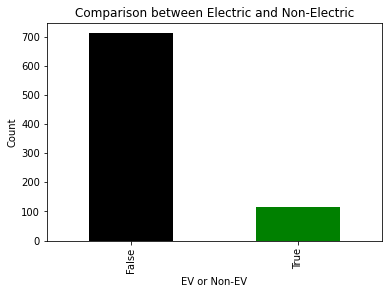

False    904
True      95
Name: Electric, dtype: int64


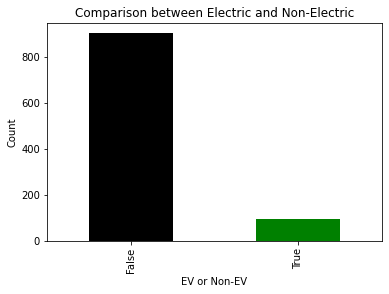

In [182]:
import matplotlib.pyplot as plt

ev_counts_2022 = df_2022_cleaned['Electric'].value_counts()
print(ev_counts_2022)

ev_counts_2022.plot(kind='bar', color=['black', 'green'])

plt.xlabel('EV or Non-EV')
plt.ylabel('Count')
plt.title('Comparison between Electric and Non-Electric')


plt.show()

ev_counts_2023 = df_2023_cleaned['Electric'].value_counts()
print(ev_counts_2023)

ev_counts_2023.plot(kind='bar', color=['black', 'green'])

plt.xlabel('EV or Non-EV')
plt.ylabel('Count')
plt.title('Comparison between Electric and Non-Electric')

plt.show()


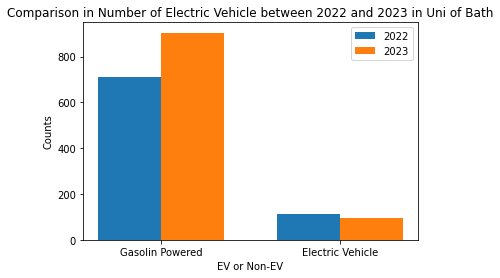

In [183]:

bar_width = 0.35
index = range(2)

counts_2022 = ev_counts_2022
counts_2023 = ev_counts_2023

plt.bar(index, counts_2022, width=bar_width, label='2022')
plt.bar([i + bar_width for i in index], counts_2023, width=bar_width, label='2023')

plt.xlabel('EV or Non-EV')
plt.ylabel('Counts')
plt.title('Comparison in Number of Electric Vehicle between 2022 and 2023 in Uni of Bath')

# Set x-axis ticks and labels
plt.xticks([i + bar_width/2 for i in index], ['Gasolin Powered', 'Electric Vehicle'])

# Display legend
plt.legend()

# Show the plot
plt.show()



### Real Comparison
    However There has been a decreased observation in number of EVs passed through the entrance of EV.
    This leads to that people in University of Bath are less aware of the environmental pollution or the university is not enoughly providing benefits for those who drive electric vehicle in general.
    Even the percentage has gone down from 0.14 to 0.09.
    The university has to hold a campaign or provide even a brief education to motivate more people to have a conservational mindset for our future generations.